## 1. Initial Question



What are the factors impacting the salary of a data scientist?
What is the salary trend for data scientist? and its comparison to living cost?
What is the predicted salary for Data Scientist in next 5 years?

1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. Many people thinks that you don’t need a degree to work in these tech companies. Is this true?
3. Are women underpaid in these companies?
4. Are non-whites paid lower than whites in these companies?
5. Does years in company affect value of granted stock and bonus?
6. For the same position or job level, does location affect base salary regardless of gender and race?


## 2. Overview and Motivation

The Harvard Business Review indicates data scientist as the sexist job of the 21st century. 

According to the Glassdoor 2022, data scientist rank the top 3 best job in America for 7 years running. This ranking is based on the career opportunites rating, number of opening jobs, and the average salaries. The median base salary is $120,000. The job opening were also spiking up from 1,736 in 2016 to 10,071 in 2022. 

Motivation?

## 3. Related Work

<b> 1. Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study </b><br>
This paper study predict the salary of IT jobs using data from Tecnoempleo, an e-Recruitment website. The result shows that experience, job stability or certain roles contribute significantly to the salary. Besides, decision trees yield a bettery accuracy (84%) than voting committe based tools.

<b> 2. Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA </b> <br>
The paper study the effects of gender, rank and speciality of the acedemic medical centers in the Western USA. among the 799 faculty members, it is found that male are paid significantly higher than feamle in general surgery and obstetrics and gynaecology. It is estimated female are paid ~$75,000 lower than their male colleague.

## 4. Data Cleaning / Data Preprocessing

# Getting the data

We have managed to find a website - Levels.fyi that collecting individual's remmuneration package. This site has had all the salary submission available in a file in json format, which ease the data extraction.

In [34]:
import pandas as pd
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,8/17/2021 8:16:36,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,Analytic,176,51,45,Female,scrielt schwists fuech xauem typaiarty siids q...,11527,819,83870
62638,8/17/2021 8:22:17,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,Full Stack,43,0,7,Male,pauss jiusts liaop rhiitts proing smiodly splu...,9606,560,83871
62639,8/17/2021 8:24:56,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,Networking,179,7,14,Male,triasm froidy peusk juieck skaorr,7422,807,83872
62640,8/17/2021 8:26:21,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,Full Stack,72,0,14,,hypoiarly khoiarts krol sqierg,10182,501,83874


In [22]:
# temporary - have data extracted in the event if we need to repopulate the exact same result
# df.to_excel('Levels_fyi_Salary_Data_2017-2022.xlsx',index=True, header=True)

A total of 62,642 rows with 17 columns are extracted.

From a quick glance, it is quite clear that the column 'rowNumber' is useless and so we will have the column removed.

In [35]:
df.drop(['rowNumber'],1)
df.head()

C:\Users\tansh\AppData\Local\Temp/ipykernel_4528/3709815882.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['rowNumber'],1)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


Now, we have 16 columns left in the datasets:

1. timestamp              : When the data was recorded
2. company                : Company
3. level                  : Job level
4. title                  : Job title
5. totalyearlycompensation: Annual remmuneration package in US$ '000, including base salary, value of granted stock and bonus
6. location               : Job location
7. yearsofexperience      : Years of experience
8. yearsatcompany         : Years in the company
9. tag                    : NA
10. basesalary            : Basic salary (US$ '000)
11. stockgrantvalue       : Value of granted stock (US$ '000)
12. bonus                 : Bonus (US$ '000)
13. gender                : gender
14. otherdetails          : Other details submitted
15. cityid                : ID of the city where the job was located
16. dmaid                 : DMA (Designated Market Area) regions are the geographic areas in the U.S. in which local television viewing is measured by Nielsen
17. rowNumber             : Instance ID



# Understand data

Next, we will look into the datatypes and ensure the right datatypes are used. This is to make sure the data can be interpreted correctly in the later steps.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

The object type for the some of the columns doesn't looks right. For exmaple, the data type for column 'timestamp' should be datetime64. So, let's change the data type.

In [37]:
# Convert column 'timestamp' to data type datetime64
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M:%S')


# Convert column 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany','basesalary', 'stockgrantvalue', 'bonus','cityid', 'dmaid' into integer
df['totalyearlycompensation'] = pd.to_numeric(df['totalyearlycompensation'])
df['yearsofexperience'] = pd.to_numeric(df['yearsofexperience'])
df['yearsatcompany'] = pd.to_numeric(df['yearsatcompany'])
df['basesalary'] = pd.to_numeric(df['basesalary'])
df['stockgrantvalue'] = pd.to_numeric(df['stockgrantvalue'])
df['bonus'] = pd.to_numeric(df['bonus'])
df['cityid'] = pd.to_numeric(df['cityid'])
df['dmaid'] = pd.to_numeric(df['dmaid'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62642 non-null  object        
 2   level                    62642 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  int64         
 7   yearsatcompany           62642 non-null  int64         
 8   tag                      62642 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  int64         
 11  bonus                    62642 non-null  int64         
 12  gender                   62642 n

Next, we will be using statistic to understand the data better.

In [38]:
df.describe(include='all',datetime_is_numeric=True)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
count,62642,62642,62642,62642,6.264200e+04,62642,62642.000000,62642.000000,62642,6.264200e+04,6.264200e+04,62642.000000,62642,62642,62642.000000,62640.000000,62642.000000
unique,NaN,1871,3074,15,NaN,1050,NaN,NaN,3276,NaN,NaN,NaN,5,40133,NaN,NaN,NaN
top,NaN,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,,NaN,NaN,NaN
freq,NaN,8054,5008,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,22503,NaN,NaN,NaN
mean,2020-07-17 03:30:08.313815040,NaN,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,NaN,1.798145e+03,1.134865e+03,242.317199,NaN,NaN,9856.201989,616.097222,41694.723732
min,2017-06-07 11:33:27,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,2020-01-11 23:12:55.500000,NaN,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,NaN,8.800000e+01,0.000000e+00,1.000000,NaN,NaN,7369.000000,506.000000,20069.250000
50%,2020-09-21 16:31:21,NaN,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,NaN,1.310000e+02,2.300000e+01,13.000000,NaN,NaN,7839.000000,807.000000,42019.000000
75%,2021-03-26 15:19:06.500000,NaN,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,NaN,1.810000e+02,6.400000e+01,27.000000,NaN,NaN,11521.000000,807.000000,63021.750000
max,2021-08-17 08:28:57,NaN,NaN,NaN,3.386013e+06,NaN,90.000000,90.000000,NaN,2.057772e+06,3.140803e+06,384026.000000,NaN,NaN,47926.000000,881.000000,83875.000000


A total of 62,642 salary submission are collected between July 2017 to Aug 2021. Most of the submission are from Amazon, and it is not surprise the top submission location is Seattle, WA, where Amazon's headquarter is located.

# Data Cleaning & Data Preparation
As the statistic summary gives limited information, we will zoom into columns by columns as part of the data cleaning and data preparation.

Let's start with column 'location'

In [39]:
df['location'].value_counts()

Seattle, WA                 8701
San Francisco, CA           6797
New York, NY                4562
Redmond, WA                 2649
Mountain View, CA           2275
                            ... 
Oulu, OU, Finland              1
Tracy, CA                      1
San Marcos, CA                 1
Bielefeld, NW, Germany         1
Pasir Ris, SG, Singapore       1
Name: location, Length: 1050, dtype: int64

The location consists city, state and country. Let's split that into 3 different columns to ease the analysis.

In [40]:
df[['city', 'state', 'country_', 'others']] = df['location'].str.split(',', expand=True)
df[['city', 'state', 'country_','others']].value_counts()

city   state  country_  others
Seoul   KG     Korea     South    23
Suwon   KG     Korea     South     1
dtype: int64

In [8]:
# Combine Korea South as country
df['country'] = df['country_'] + df['others'].fillna('')

# Drop column 'country_' and 'others'
df = df.drop (['others','country_'],1)

# Fill empty cell in column 'country' as USA
df.country.fillna('USA',inplace=True)


df[['city', 'state', 'country']].value_counts()

C:\Users\tansh\AppData\Local\Temp/ipykernel_4528/2314979603.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop (['others','country_'],1)


city           state  country
Seattle         WA    USA        8701
San Francisco   CA    USA        6797
New York        NY    USA        4562
Redmond         WA    USA        2649
Mountain View   CA    USA        2275
                                 ... 
Glen Allen      VA    USA           1
Gliwice         SL     Poland       1
Goa             GA     India        1
Reidsville      NC    USA           1
Miramar         FL    USA           1
Length: 1050, dtype: int64

Column 'location' looks good now. Let's move on to column 'total yearly compensation'. Per the levels.fyi, this compensation is collected in in US$ ('000)

#### Data cleaning for totalyearlycompensation (including base salary, value of stock grant & bonus)

In [41]:
df['totalyearlycompensation'].describe()

count    6.264200e+04
mean     3.175327e+03
std      3.877877e+04
min      0.000000e+00
25%      1.160000e+02
50%      1.830000e+02
75%      2.690000e+02
max      3.386013e+06
Name: totalyearlycompensation, dtype: float64

In [42]:
#remove submission where total yearly compensation = 0
df = df[df['totalyearlycompensation'] != 0]
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber
count,6.034500e+04,60345.000000,60345.000000,6.034500e+04,6.034500e+04,60345.000000,60345.000000,60343.000000,60345.000000
mean,3.296194e+03,7.173784,2.679675,1.866590e+03,1.178063e+03,251.540873,9873.831171,613.830519,43000.067412
std,3.950490e+04,6.432553,3.519011,1.963205e+04,2.568038e+04,3778.816687,6728.583336,290.836150,23987.579330
min,3.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,1.240000e+02,3.000000,0.000000,9.300000e+01,1.000000e+00,3.000000,7369.000000,505.000000,22450.000000
50%,1.880000e+02,5.000000,1.000000,1.340000e+02,2.500000e+01,14.000000,7839.000000,807.000000,43690.000000
75%,2.740000e+02,10.000000,4.000000,1.840000e+02,6.700000e+01,27.000000,11521.000000,807.000000,63733.000000
max,3.386013e+06,90.000000,90.000000,2.057772e+06,3.140803e+06,384026.000000,47926.000000,881.000000,83875.000000


In [44]:
# df2 = df[df['totalyearlycompensation'] >= 0]

In [113]:
# df=df2

In [114]:
# df = df.drop(['country_','others','basesalary2'],1)

C:\Users\tansh\AppData\Local\Temp/ipykernel_4528/559693409.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['country_','others','basesalary2'],1)


In [115]:
import seaborn as sns
sns.boxplot(x=df['totalyearlycompensation'])

Software Engineer               39700
Product Manager                  4406
Software Engineering Manager     3339
Data Scientist                   2481
Hardware Engineer                2154
Product Designer                 1462
Technical Program Manager        1379
Solution Architect               1101
Management Consultant             976
Business Analyst                  882
Marketing                         708
Mechanical Engineer               489
Sales                             457
Recruiter                         448
Human Resources                   363
Name: title, dtype: int64

The data is highly skewed towards right. The median compensation is $183,000, however the mean is ~$3,175,000. 
Furthermore, the maximum salary submission is at 3.38 billion. 

As the salary submission in levels.fyi is collected in the unit of thousand ('000), it is reasonable to suspect that some of the submission has mistakenly submit the compensation as US$ instead of US$ '000. For example, if one is getting yearly compensation is $120,000, he/she shall key in 120, instead of 120,000.

Let's taking the submission where the base salary, value of stock grant and bonus has been consistently inputing a value that exeeds 2,000 (where it means $2,000,000)

In [116]:
df[(df['basesalary'] >= 2000) & 
   ((df['stockgrantvalue'] == 0) | (df['stockgrantvalue'] >= 2000)) & 
   ((df['bonus'] == 0) | (df['bonus'] >= 2000))]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,city,state,to_divide
14,2017-06-29 15:14:16,Microsoft,59,Software Engineer,135281.0,"Seattle, WA",1,1,,118988.0,8364.0,7929.0,,,11527,819.0,17,Seattle,WA,1
19,2017-07-08 14:41:38,Microsoft,61,Product Manager,108698.0,"Seattle, WA",6,3,,99095.0,4549.0,5054.0,,birm,11527,819.0,22,Seattle,WA,1
27,2017-07-25 11:01:33,Amazon,SDE II,Software Engineer,160646.0,"Seattle, WA",3,0,,107652.0,8398.0,44596.0,,,11527,819.0,32,Seattle,WA,1
35,2017-08-01 12:55:06,Microsoft,61,Software Engineer,215688.0,"Redmond, WA",5,1,,184371.0,27366.0,3951.0,,,11521,819.0,40,Redmond,WA,1
39,2017-08-06 12:23:42,Microsoft,60,Software Engineer,109121.0,"Redmond, WA",3,2,,95533.0,5269.0,8319.0,,,11521,819.0,44,Redmond,WA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,2019-08-14 15:42:30,General Motors,L5,Software Engineer,119399.0,"Detroit, MI",4,3,Full Stack,110011.0,0.0,9388.0,Male,,9052,505.0,13143,Detroit,MI,1
10832,2019-08-26 02:09:18,Bloomberg,Software Engineer,Software Engineer,66317.0,"London, EN, United Kingdom",1,1,Full Stack,61639.0,0.0,4678.0,Female,flaiang spluorst stieuhn,12008,0.0,13684,London,EN,1
10886,2019-08-27 18:56:39,Cisco,Software Engineer III,Software Engineer,141693.0,"Richardson, TX",3,4,Testing (SDET),134784.0,0.0,6909.0,Male,,11217,623.0,13759,Richardson,TX,1
11103,2019-09-03 19:16:52,Verizon,MTS I,Software Engineer,96912.0,"Atlanta, GA",0,0,DevOps,91958.0,0.0,4954.0,,,7839,524.0,14047,Atlanta,GA,1


A quick glance shows that the assumption made is correct. For example, a Microsoft Software Engineer is reasonable to believe paid at ~$ 135k annually, instead of $135mil anually.

We will now have these submissions divide by 1000.

In [117]:
import numpy as np
df['to_divide'] = np.where(( 
                (df['basesalary'] >= 2000) & 
                ((df['stockgrantvalue'] == 0) | (df['stockgrantvalue'] >= 2000)) & 
                ((df['bonus'] == 0) | (df['bonus'] >= 2000))),1000,1)

df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,city,state,to_divide
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186.000,"Redwood City, CA",1,1,,160.000,17.000,9.000,,,7392,807.0,1,Redwood City,CA,1
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126.000,"Seattle, WA",10,0,,126.000,0.000,0.000,,,11527,819.0,3,Seattle,WA,1
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171.348,"Redmond, WA",13,13,,92.799,55.371,23.178,,,11521,819.0,5,Redmond,WA,1
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214.175,"Vancouver, BC, Canada",13,1,,156.335,0.000,57.840,,,1320,0.0,6,Vancouver,BC,1
5,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,423.000,"Sunnyvale, CA",6,6,,157.000,219.000,47.000,,,7472,807.0,7,Sunnyvale,CA,1


In [118]:
df['basesalary'] = df['basesalary']/df['to_divide']
df['stockgrantvalue'] = df['stockgrantvalue']/df['to_divide']
df['bonus'] = df['bonus']/df['to_divide']
df['totalyearlycompensation'] = df['totalyearlycompensation']/df['to_divide']

df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,city,state,to_divide
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186.000,"Redwood City, CA",1,1,,160.000,17.000,9.000,,,7392,807.0,1,Redwood City,CA,1
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126.000,"Seattle, WA",10,0,,126.000,0.000,0.000,,,11527,819.0,3,Seattle,WA,1
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171.348,"Redmond, WA",13,13,,92.799,55.371,23.178,,,11521,819.0,5,Redmond,WA,1
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214.175,"Vancouver, BC, Canada",13,1,,156.335,0.000,57.840,,,1320,0.0,6,Vancouver,BC,1
5,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,423.000,"Sunnyvale, CA",6,6,,157.000,219.000,47.000,,,7472,807.0,7,Sunnyvale,CA,1


In [119]:
#let's examine the totalyearlycompensation again
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,to_divide
count,6.034500e+04,60345.000000,60345.000000,60345.000000,6.034500e+04,60345.000000,60345.000000,60343.000000,60345.000000,60345.000000
mean,5.143919e+02,7.173784,2.679675,294.148069,1.739871e+02,46.256761,9873.831171,613.830519,43000.067412,2.556152
std,9.168949e+03,6.432553,3.519011,4945.188505,6.867547e+03,1111.389886,6728.583336,290.836150,23987.579330,39.397971
min,2.057772e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.230000e+02,3.000000,0.000000,93.000000,1.000000e+00,3.000000,7369.000000,505.000000,22450.000000,1.000000
50%,1.870000e+02,5.000000,1.000000,133.000000,2.500000e+01,13.000000,7839.000000,807.000000,43690.000000,1.000000
75%,2.700000e+02,10.000000,4.000000,182.000000,6.600000e+01,27.000000,11521.000000,807.000000,63733.000000,1.000000
max,1.160132e+06,90.000000,90.000000,342782.000000,1.055359e+06,116638.000000,47926.000000,881.000000,83875.000000,1000.000000


There is outlier as the highest compensation is 1.16billion. Let's take a look on this submission.

In [121]:
df[df['totalyearlycompensation'] >= 1000000]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,city,state,to_divide
924,2018-06-29 00:38:36,Facebook,E5,Software Engineer,1160132.0,"Menlo Park, CA",8,0,,163.0,1055359.0,104610.0,Male,,7300,807.0,1012,Menlo Park,CA,1


Make reference to the base salary of $163k, the value of stock grant and bonus has seems to be inputted in $ instead of $('000). Let's correct this submission by dividing value of stock grant and bonus by 1000, and recompute the total yearly compensation.

In [129]:
df['stockgrantvalue'].mask(df['timestamp'] == '2018-06-29 00:38:36', df['stockgrantvalue']/1000, inplace = True)
df['bonus'].mask(df['timestamp'] == '2018-06-29 00:38:36', df['bonus']/1000, inplace = True)

In [131]:
df['totalyearlycompensation'].mask(df['timestamp'] == '2018-06-29 00:38:36', df['basesalary']+df['stockgrantvalue']+df['bonus'] , inplace = True)

In [135]:
# check if the data is corrected corerctly
df[df['timestamp'] == '2018-06-29 00:38:36']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,city,state,to_divide
924,2018-06-29 00:38:36,Facebook,E5,Software Engineer,1322.969,"Menlo Park, CA",8,0,,163.0,1055.359,104.61,Male,,7300,807.0,1012,Menlo Park,CA,1


In [136]:
#let's examine the totalyearlycompensation again
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,to_divide
count,60345.000000,60345.000000,60345.000000,60345.000000,60345.000000,60345.000000,60345.000000,60343.000000,60345.000000,60345.000000
mean,495.188866,7.173784,2.679675,294.148069,156.515834,44.524963,9873.831171,613.830519,43000.067412,2.556152
std,7860.353403,6.432553,3.519011,4945.188505,5358.337251,1026.643595,6728.583336,290.836150,23987.579330,39.397971
min,2.057772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,123.000000,3.000000,0.000000,93.000000,1.000000,3.000000,7369.000000,505.000000,22450.000000,1.000000
50%,187.000000,5.000000,1.000000,133.000000,25.000000,13.000000,7839.000000,807.000000,43690.000000,1.000000
75%,270.000000,10.000000,4.000000,182.000000,66.000000,27.000000,11521.000000,807.000000,63733.000000,1.000000
max,685150.000000,90.000000,90.000000,342782.000000,684882.000000,116638.000000,47926.000000,881.000000,83875.000000,1000.000000


The data is less noisy, but it still highly skewed towards right. In this case, we will use the quartile to remove the outliers. Let's check out the 95th and 99th of quartile.

In [138]:
df['totalyearlycompensation'].quantile([0.95,0.99])

0.95    481.0
0.99    788.0
Name: totalyearlycompensation, dtype: float64

The 95th quartile and 99th quartile are at $475,000 and $788,000. Yearly compensation of $780,000 is possible and hence we will use this as cut-off point in removing the outliers.

In [139]:
df = df[df['totalyearlycompensation'] <= 788]
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,to_divide
count,59744.000000,59744.000000,59744.000000,59744.000000,59744.000000,59744.000000,59744.000000,59742.000000,59744.000000,59744.000000
mean,209.664877,7.115777,2.666661,140.309916,49.734157,19.620804,9883.805185,612.478005,43129.807897,2.555085
std,124.632945,6.384410,3.503506,67.951058,71.822706,26.011404,6749.971342,291.519646,23925.390900,39.384484
min,2.057772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,123.000000,3.000000,0.000000,92.000000,1.000000,3.000000,7369.000000,505.000000,22699.500000,1.000000
50%,185.000000,5.000000,1.000000,132.000000,24.000000,13.000000,7839.000000,807.000000,43801.500000,1.000000
75%,267.000000,10.000000,4.000000,180.000000,64.000000,27.000000,11521.000000,807.000000,63827.250000,1.000000
max,788.000000,90.000000,90.000000,785.000000,680.000000,517.000000,47926.000000,881.000000,83875.000000,1000.000000


The total yearly compensation, including base salary, stock grant value and bonus is now looks cleaner.

#### Data cleaning for yearsofexperience

<AxesSubplot:xlabel='yearsofexperience'>

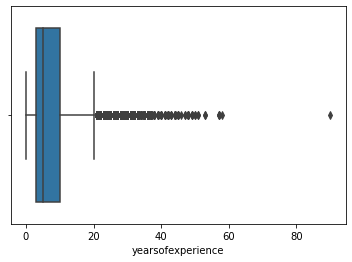

In [171]:
import seaborn as sns
sns.boxplot(x=df['yearsofexperience'])

The submission consists outlier. Let's check it out and have it removed.

In [140]:
df[df['yearsofexperience'] > 80]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,city,state,to_divide
47788,2021-04-03 11:04:46,Disney,5,Product Designer,141.0,"Crapo, MD",90,90,Interaction Design,139.0,2.0,0.0,,bruarry druably hriaold,23596,512.0,64028,Crapo,MD,1


In [172]:
df = df[df['yearsofexperience'] <= 80]
df.describe()                            

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber
count,59717.000000,59717.000000,59717.000000,59717.000000,59717.000000,59717.000000,59717.000000,59715.000000,59717.000000
mean,209.407045,7.112414,2.664953,140.257126,49.557499,19.592420,9882.777283,612.567211,43119.329739
std,123.791433,6.372826,3.484039,67.769432,71.195946,25.951908,6747.826595,291.504141,23932.657419
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,123.000000,3.000000,0.000000,92.000000,1.000000,3.000000,7369.000000,505.000000,22678.000000
50%,185.000000,5.000000,1.000000,132.000000,24.000000,13.000000,7839.000000,807.000000,43788.000000
75%,267.000000,10.000000,4.000000,180.000000,64.000000,27.000000,11521.000000,807.000000,63824.000000
max,770.000000,58.000000,47.000000,766.000000,684.882000,517.000000,47926.000000,881.000000,83875.000000


The numerical columns are now clean and let's move on to the non-numerical data - gender.

#### Data cleaning for gender

In [173]:
df['gender'].value_counts()

Male                               34555
                                   17986
Female                              6807
Other                                368
Title: Senior Software Engineer        1
Name: gender, dtype: int64

Most of the submission are male, wher female has only 6,807. >18,000 submitters did not disclose their gender. There is one submission with 'Title: Senior Software Engineer' is clearly wrong and need to be omitted.

Question - shall we merge empty and other as one category?

In [174]:
df = df[df['gender'] != 'Title: Senior Software Engineer']
df['gender'].value_counts()                                                   

Male      34555
          17986
Female     6807
Other       368
Name: gender, dtype: int64

<note>
    
Junior = 1 - 4 years
Mid-level = 5-9 years
Senior = 10+ years

or 
0-1 years
104 years
5-9 years
10-19 years
20 years and above

Living cost


Introduction of team?

## Appendix

<draft>
Best Jobs in America 2022 Employees' Choice (2022). Glassdoor. Retrived on May 3, 2022 from
https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Data Scientist Salary-The Ultimate Guide for 2021 (2022). ProjectPro. Retrived on May 3, 2022 from https://www.projectpro.io/article/data-scientist-salary-the-ultimate-guide-for-2021/218

Davenport, T H. & Patil, DJ. (2012). Data Scientist: The Sexiest Job of the 21st Century. *HARVARD BUSINESS REVIEW*. Retrieved on 3 May, 2022 from https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

Martin, I., Mariello, A., Battiti, R. & Hernandez, J A. (2018). Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study. *International Journal of Computational Intelligence Systems, 11, 1192-1209*. https://libkey.io/libraries/2611/articles/225996272/full-text-file   
    
    
Miller, H., Seckel, Ea., White, CL., et al. (2021). Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA. http://dx.doi.org/10.1136/bmjopen-2021-059216
    
Seaman, A. (2021). LinkedIn Jobs on the Rise: 15 opportunities that are in demand and hiring now. Retrieved on May 3, 2022 from https://www.linkedin.com/pulse/linkedin-jobs-rise-15-opportunities-demand-hiring-now-andrew-seaman/
    